# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['mataura',
 'geraldton',
 'vaitupu',
 'berlevag',
 'ahuimanu',
 'smidovich',
 'ust-kuyga',
 'kavieng',
 'barrow',
 'mahebourg',
 'yangambi',
 'new norfolk',
 'khatanga',
 'saskylakh',
 'kiama',
 'hermanus',
 'saleaula',
 'rikitea',
 'vao',
 'georgetown',
 'illoqqortoormiut',
 'mehran',
 'falealupo',
 'vaini',
 'busselton',
 'kapaa',
 'celestun',
 'hilo',
 'ribeira grande',
 'ponta delgada',
 'belyy yar',
 'amderma',
 'astana',
 'lagoa',
 'castro',
 'tuktoyaktuk',
 'east london',
 'kropotkin',
 'dikson',
 'ushuaia',
 'chokurdakh',
 'stonewall',
 'kavaratti',
 'sao jose da coroa grande',
 'phichit',
 'avarua',
 'lorengau',
 'meulaboh',
 'punta arenas',
 'tual',
 'bassano',
 'sentyabrskiy',
 'sinnamary',
 'porto novo',
 'bengkulu',
 'port alfred',
 'ust-nera',
 'yellowknife',
 'nanortalik',
 'yertsevo',
 'gombong',
 'albany',
 'port blair',
 'labutta',
 'devrek',
 'esperance',
 'lebu',
 'ondorhaan',
 'almenara',
 'qaanaaq',
 'chuy',
 'omboue',
 'tiznit',
 'loznica',
 'pevek',
 'carnarvon

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
#Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Set up lists to hold reponse info
names = []
temp = []
resp_obj=[]
lat=[]
long=[]
cloudiness=[]
windspeed=[]
humidity=[]
country=[]
date=[]
cnt = 0
for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        resp_obj.append(response)
        names.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing record {i+1} of {len(cities)} for the city: {city}')
        time.sleep(0.5)
    except:
        print(f'City not found.')  

Processing record 1 of 576 for the city: mataura
Processing record 2 of 576 for the city: geraldton
City not found.
Processing record 4 of 576 for the city: berlevag
Processing record 5 of 576 for the city: ahuimanu
Processing record 6 of 576 for the city: smidovich
Processing record 7 of 576 for the city: ust-kuyga
Processing record 8 of 576 for the city: kavieng
Processing record 9 of 576 for the city: barrow
Processing record 10 of 576 for the city: mahebourg
Processing record 11 of 576 for the city: yangambi
Processing record 12 of 576 for the city: new norfolk
Processing record 13 of 576 for the city: khatanga
Processing record 14 of 576 for the city: saskylakh
Processing record 15 of 576 for the city: kiama
Processing record 16 of 576 for the city: hermanus
City not found.
Processing record 18 of 576 for the city: rikitea
Processing record 19 of 576 for the city: vao
Processing record 20 of 576 for the city: georgetown
City not found.
Processing record 22 of 576 for the city: meh

Processing record 167 of 576 for the city: provideniya
Processing record 168 of 576 for the city: san ramon de la nueva oran
Processing record 169 of 576 for the city: lahat
Processing record 170 of 576 for the city: leningradskiy
Processing record 171 of 576 for the city: lavrentiya
Processing record 172 of 576 for the city: hofn
Processing record 173 of 576 for the city: astoria
Processing record 174 of 576 for the city: hobart
City not found.
Processing record 176 of 576 for the city: oud-beijerland
Processing record 177 of 576 for the city: casino
Processing record 178 of 576 for the city: vikhorevka
Processing record 179 of 576 for the city: onguday
Processing record 180 of 576 for the city: haines junction
City not found.
Processing record 182 of 576 for the city: saint george
Processing record 183 of 576 for the city: constitucion
Processing record 184 of 576 for the city: kodiak
Processing record 185 of 576 for the city: potoru
Processing record 186 of 576 for the city: miri
Pr

Processing record 331 of 576 for the city: saint-augustin
Processing record 332 of 576 for the city: aswan
Processing record 333 of 576 for the city: koszalin
Processing record 334 of 576 for the city: phalaborwa
Processing record 335 of 576 for the city: cockburn town
Processing record 336 of 576 for the city: maneadero
Processing record 337 of 576 for the city: vlissingen
Processing record 338 of 576 for the city: sabzevar
City not found.
Processing record 340 of 576 for the city: pangnirtung
Processing record 341 of 576 for the city: dongying
Processing record 342 of 576 for the city: batagay-alyta
Processing record 343 of 576 for the city: andenes
Processing record 344 of 576 for the city: thinadhoo
City not found.
Processing record 346 of 576 for the city: asau
Processing record 347 of 576 for the city: komsomolskiy
Processing record 348 of 576 for the city: xiaoweizhai
Processing record 349 of 576 for the city: santa isabel
Processing record 350 of 576 for the city: wenling
Proce

Processing record 497 of 576 for the city: utmanzai
Processing record 498 of 576 for the city: furano
Processing record 499 of 576 for the city: jiaojiang
Processing record 500 of 576 for the city: ontario
Processing record 501 of 576 for the city: koslan
Processing record 502 of 576 for the city: nambucca heads
Processing record 503 of 576 for the city: marsh harbour
Processing record 504 of 576 for the city: winton
Processing record 505 of 576 for the city: nosy varika
Processing record 506 of 576 for the city: baiyin
Processing record 507 of 576 for the city: abha
Processing record 508 of 576 for the city: manhattan
Processing record 509 of 576 for the city: makakilo city
Processing record 510 of 576 for the city: meadow lake
Processing record 511 of 576 for the city: mstera
Processing record 512 of 576 for the city: padang
Processing record 513 of 576 for the city: lukang
Processing record 514 of 576 for the city: san matias
Processing record 515 of 576 for the city: sukhobezvodnoy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_dict = {
    "City": names,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":date
}
cities_data = pd.DataFrame(cities_dict)
cities_data.to_csv('../output_data/cities.csv')
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,53.47,80,100,0.76,NZ,1643904013
1,Geraldton,-28.7667,114.6000,72.01,60,0,4.61,AU,1643904015
2,Berlevåg,70.8578,29.0864,22.80,79,75,5.75,NO,1643904017
3,‘Āhuimanu,21.4447,-157.8378,71.85,81,15,1.01,US,1643904019
4,Smidovich,48.6000,133.8167,-23.71,100,46,2.86,RU,1643904020
...,...,...,...,...,...,...,...,...,...
527,Muisne,0.6000,-80.0333,79.34,72,77,7.07,EC,1643904449
528,Joshīmath,30.5667,79.5667,38.95,97,100,2.42,IN,1643904450
529,Cururupu,-1.8283,-44.8683,86.29,61,99,6.04,BR,1643904450
530,Alice Springs,-23.7000,133.8833,63.95,68,100,6.91,AU,1643904451


In [7]:
# file_to_load = "../output_data/cities.csv"
# # Read Purchasing File and store into Pandas data frame
# cities_data_1 = pd.read_csv(file_to_load)
# cities_data_1.head()

In [8]:
print(f"The total No. of unique Cities is: {len(pd.unique(cities_data['City']))}.")

The total No. of unique Cities is: 532.


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#check if there are any cities with >100% humidity
high_humidity = cities_data[(cities_data['Humidity'] > 100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
clean_cities_data = cities_data.drop(cities_data[cities_data["Humidity"]>100].index)
clean_cities_data.reset_index(inplace=True)
print(f"The clean No. of unique Cities is: {len(pd.unique(clean_cities_data['City']))}.")

The clean No. of unique Cities is: 532.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Date record

In [11]:
endRunDate = clean_cities_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Humidity Plot

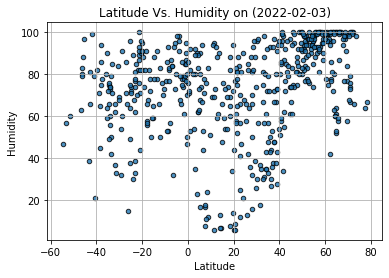

In [12]:
title = "Latitude Vs. Humidity"
Fig_1 = clean_cities_data.plot(kind="scatter", x="Lat", y="Humidity", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_1.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Cloudiness Plot

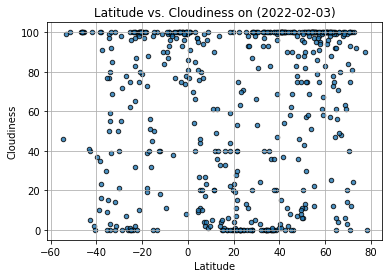

In [13]:
title = "Latitude vs. Cloudiness"
Fig_2 = clean_cities_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_2.get_figure().savefig(f"../output_data/{title}.png")

## Latitude vs. Wind Speed Plot

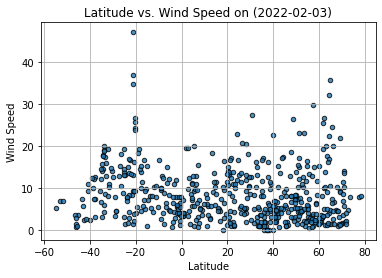

In [14]:
title = "Latitude vs. Wind Speed"
Fig_3 = clean_cities_data.plot(kind="scatter", x="Lat", y="Wind Speed", 
                                      title=f"{title} on ({runDate})", xlabel=("Latitude"),
                                      edgecolor="black",linewidth=1,marker="o",alpha=0.8,
                                      grid = True)

Fig_3.get_figure().savefig(f"../output_data/{title}.png")

## Linear Regression

In [15]:
def plot_linear_regression(x_values,y_values,y_label,text_coordinates):
    
    # Run regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #print out
    print(f" Slope:{slope}\n",
      f"Intercept:{intercept}\n",
      f"The r-squared is:{rvalue}\n",
      '--------------------------\n',
      f'{line_eq}') 
    # Plot
    plt.scatter(x_values,y_values, edgecolor="black",linewidth=1,marker="o",alpha=0.8)
    plt.plot(x_values, regress_values, "r-") 
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    plt.savefig(f"../output_data/{title}.png")
    plt.show()

In [16]:
L=0
north_hemi = clean_cities_data.query(f"Lat >= {L}")
south_hemi = clean_cities_data.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:-1.4975008524328255
 Intercept:97.1749633192767
 The r-squared is:-0.8619038024846497
 --------------------------
 y = -1.5 x + 97.17


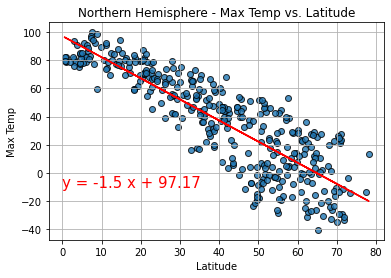

In [17]:
title = "Northern Hemisphere - Max Temp vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (0,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Slope:0.4342760396288785
 Intercept:84.58404928554837
 The r-squared is:0.5815799315953026
 --------------------------
 y = 0.43 x + 84.58


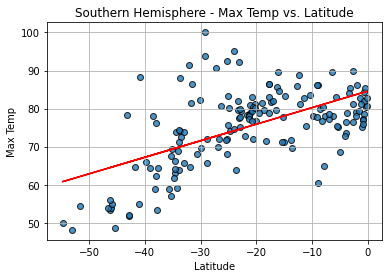

In [18]:
title ="Southern Hemisphere - Max Temp vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Max Temp"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Max Temp', (-45,45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.5817983543153453
 Intercept:51.08676449679892
 The r-squared is:0.47812988700041226
 --------------------------
 y = 0.58 x + 51.09


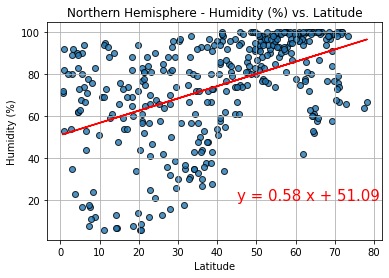

In [19]:
title="Northern Hemisphere - Humidity (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (45,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Slope:0.26638790257078004
 Intercept:78.13351249472608
 The r-squared is:0.21229674789478273
 --------------------------
 y = 0.27 x + 78.13


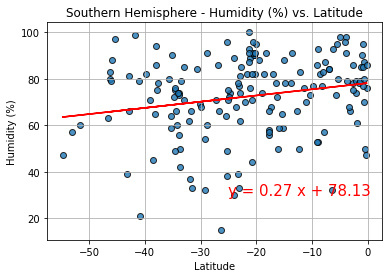

In [20]:
title="Southern Hemisphere - Humidity (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Humidity"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Humidity (%)', (-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.6645419118777465
 Intercept:34.05918428491409
 The r-squared is:0.3320359881140392
 --------------------------
 y = 0.66 x + 34.06


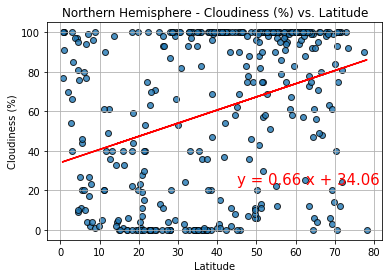

In [21]:
title="Northern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (45,23))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Slope:0.8190511832516795
 Intercept:85.86834854856193
 The r-squared is:0.3000302497201061
 --------------------------
 y = 0.82 x + 85.87


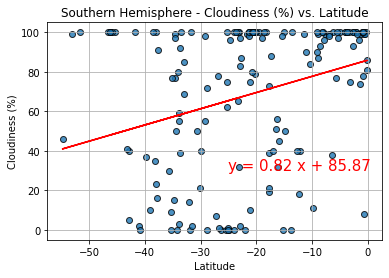

In [22]:
title="Southern Hemisphere - Cloudiness (%) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Cloudiness (%)', (-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:-0.0027687304369307902
 Intercept:7.771722563990934
 The r-squared is:-0.0090636991188035
 --------------------------
 y = -0.0 x + 7.77


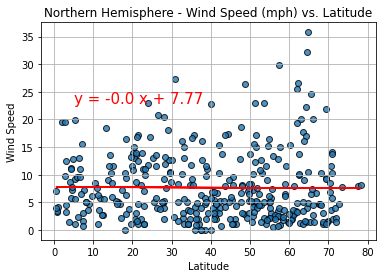

In [23]:
title="Northern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = north_hemi ["Lat"]
y_values = north_hemi ["Wind Speed"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (5,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Slope:0.8190511832516795
 Intercept:85.86834854856193
 The r-squared is:0.3000302497201061
 --------------------------
 y = 0.82 x + 85.87


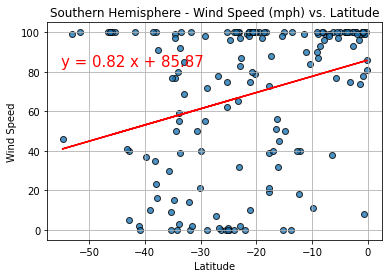

In [24]:
title="Southern Hemisphere - Wind Speed (mph) vs. Latitude"
x_values = south_hemi ["Lat"]
y_values = south_hemi ["Cloudiness"]
plt.title(f"{title}")
plot_linear_regression(x_values,y_values,'Wind Speed', (-55,83))